In [ ]:
%reset

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
df = pd.read_csv("../input/data.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df = df.astype(str)

In [5]:
df.dtypes

Unnamed: 0                  object
ID                          object
Name                        object
Age                         object
Photo                       object
Nationality                 object
Flag                        object
Overall                     object
Potential                   object
Club                        object
Club Logo                   object
Value                       object
Wage                        object
Special                     object
Preferred Foot              object
International Reputation    object
Weak Foot                   object
Skill Moves                 object
Work Rate                   object
Body Type                   object
Real Face                   object
Position                    object
Jersey Number               object
Joined                      object
Loaned From                 object
Contract Valid Until        object
Height                      object
Weight                      object
LS                  

In [6]:
def nospace(name):
    name = name.split(" ")
    name = "_".join(name)
    return name

In [7]:

new_columns = list(map(nospace,df.columns))


In [8]:
df.columns = new_columns

In [9]:
df.columns

Index(['Unnamed:_0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred_Foot', 'International_Reputation', 'Weak_Foot',
       'Skill_Moves', 'Work_Rate', 'Body_Type', 'Real_Face', 'Position',
       'Jersey_Number', 'Joined', 'Loaned_From', 'Contract_Valid_Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [10]:
skills = df.columns[54:88].tolist()

In [11]:
df = df.loc[:,['Name','Age','Overall','Potential','Value','International_Reputation',
             'Skill_Moves','Position',*skills]]

In [12]:
df.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Value',
       'International_Reputation', 'Skill_Moves', 'Position', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [13]:
df.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,€110.5M,5.0,4.0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,€77M,5.0,5.0,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,€118.5M,5.0,5.0,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,€72M,4.0,1.0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,€102M,4.0,4.0,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [14]:
def get_value(s):
    
    last = s[-1]
    s = s[1:-1]
    try:
        val = float(s)
    except:
        return 0.0
    
    if last == 'M':
        val = val * 1000000.0
    if last == 'K':
        val = val * 1000.0
    return val

In [15]:
df['Value'] = df['Value'].apply(get_value)

In [16]:
df.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,110500000.0,5.0,4.0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,77000000.0,5.0,5.0,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,118500000.0,5.0,5.0,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,72000000.0,4.0,1.0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,102000000.0,4.0,4.0,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [17]:
df = df.dropna(subset = ['Value'])

In [18]:
df.shape

(18207, 42)

In [19]:
df = df[df['Value']!=0]

In [20]:
df.shape

(17955, 42)

In [21]:
def Pos(s):
    if s is None:
        return None
    if 'G' in s:
        return 1.0
    if 'B' in s:
        return 2.0
    if 'M' in s:
        return 3.0
    if 'W' in s:
        return 4.0
    if 'S' in s or 'F' in s:
        return 5.0

In [22]:
df.head()

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,110500000.0,5.0,4.0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,77000000.0,5.0,5.0,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,118500000.0,5.0,5.0,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,72000000.0,4.0,1.0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,102000000.0,4.0,4.0,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [23]:
df.dtypes

Name                         object
Age                          object
Overall                      object
Potential                    object
Value                       float64
International_Reputation     object
Skill_Moves                  object
Position                     object
Crossing                     object
Finishing                    object
HeadingAccuracy              object
ShortPassing                 object
Volleys                      object
Dribbling                    object
Curve                        object
FKAccuracy                   object
LongPassing                  object
BallControl                  object
Acceleration                 object
SprintSpeed                  object
Agility                      object
Reactions                    object
Balance                      object
ShotPower                    object
Jumping                      object
Stamina                      object
Strength                     object
LongShots                   

In [24]:
df['Position'] = df['Position'].apply(Pos)

In [25]:
df.dtypes

Name                         object
Age                          object
Overall                      object
Potential                    object
Value                       float64
International_Reputation     object
Skill_Moves                  object
Position                    float64
Crossing                     object
Finishing                    object
HeadingAccuracy              object
ShortPassing                 object
Volleys                      object
Dribbling                    object
Curve                        object
FKAccuracy                   object
LongPassing                  object
BallControl                  object
Acceleration                 object
SprintSpeed                  object
Agility                      object
Reactions                    object
Balance                      object
ShotPower                    object
Jumping                      object
Stamina                      object
Strength                     object
LongShots                   

In [26]:
df.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,110500000.0,5.0,4.0,5.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,77000000.0,5.0,5.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,118500000.0,5.0,5.0,4.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,72000000.0,4.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,102000000.0,4.0,4.0,3.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [27]:
df.loc[:,['Name','Value','Position']].head(5)

,Name,Value,Position
0,L. Messi,110500000.0,5.0
1,Cristiano Ronaldo,77000000.0,5.0
2,Neymar Jr,118500000.0,4.0
3,De Gea,72000000.0,1.0
4,K. De Bruyne,102000000.0,3.0


In [28]:
def avg_best(scores):
    num_skills=5
    while None in scores:
        scores.remove(None)
    if len(scores)==0:
        return None
    elif len(scores)< num_skills:
        num_skills = len(scores)
    scores = list(map(float,scores))
    scores.sort()
    scores.reverse()
    scores = scores[0:num_skills]
    return sum(scores)/num_skills


In [29]:
df['avg_best'] = df.apply(lambda row: avg_best([row[col] for col in skills]),axis=1)


In [30]:
df = df.drop(columns=skills)

In [31]:
df.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Value',
       'International_Reputation', 'Skill_Moves', 'Position', 'avg_best'],
      dtype='object')

In [32]:
df.loc[:,["Name","Value","Position","avg_best"]].head(5)

,Name,Value,Position,avg_best
0,L. Messi,110500000.0,5.0,95.8
1,Cristiano Ronaldo,77000000.0,5.0,95.2
2,Neymar Jr,118500000.0,4.0,95.0
3,De Gea,72000000.0,1.0,89.8
4,K. De Bruyne,102000000.0,3.0,92.2


In [33]:
df.dtypes

Name                         object
Age                          object
Overall                      object
Potential                    object
Value                       float64
International_Reputation     object
Skill_Moves                  object
Position                    float64
avg_best                    float64
dtype: object

In [34]:
cols = df.columns.tolist()
cols.remove('Name')
cols.remove('Value')


In [35]:
df[cols] = df[cols].astype(float)

In [36]:
df.dtypes

Name                         object
Age                         float64
Overall                     float64
Potential                   float64
Value                       float64
International_Reputation    float64
Skill_Moves                 float64
Position                    float64
avg_best                    float64
dtype: object

In [37]:
df.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,avg_best
0,L. Messi,31.0,94.0,94.0,110500000.0,5.0,4.0,5.0,95.8
1,Cristiano Ronaldo,33.0,94.0,94.0,77000000.0,5.0,5.0,5.0,95.2
2,Neymar Jr,26.0,92.0,93.0,118500000.0,5.0,5.0,4.0,95.0
3,De Gea,27.0,91.0,93.0,72000000.0,4.0,1.0,1.0,89.8
4,K. De Bruyne,27.0,91.0,92.0,102000000.0,4.0,4.0,3.0,92.2


In [38]:
df[cols].median(axis=0)

Age                         25.0
Overall                     66.0
Potential                   71.0
International_Reputation     1.0
Skill_Moves                  2.0
Position                     3.0
avg_best                    73.8
dtype: float64

In [39]:
med_df = df[cols].median(axis=0)
med_df['Age']

25.0

In [40]:
med_dict = {}
for col in cols:
    med_dict[col] = med_df[col]
med_dict    

{'Age': 25.0,
 'Overall': 66.0,
 'Potential': 71.0,
 'International_Reputation': 1.0,
 'Skill_Moves': 2.0,
 'Position': 3.0,
 'avg_best': 73.8}

In [41]:
df.isnull().sum()

Name                         0
Age                          0
Overall                      0
Potential                    0
Value                        0
International_Reputation    48
Skill_Moves                 48
Position                    48
avg_best                    48
dtype: int64

In [42]:
df = df.fillna(value=med_dict)

In [43]:
df.isnull().sum()

Name                        0
Age                         0
Overall                     0
Potential                   0
Value                       0
International_Reputation    0
Skill_Moves                 0
Position                    0
avg_best                    0
dtype: int64

In [44]:
df.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,avg_best
0,L. Messi,31.0,94.0,94.0,110500000.0,5.0,4.0,5.0,95.8
1,Cristiano Ronaldo,33.0,94.0,94.0,77000000.0,5.0,5.0,5.0,95.2
2,Neymar Jr,26.0,92.0,93.0,118500000.0,5.0,5.0,4.0,95.0
3,De Gea,27.0,91.0,93.0,72000000.0,4.0,1.0,1.0,89.8
4,K. De Bruyne,27.0,91.0,92.0,102000000.0,4.0,4.0,3.0,92.2


In [45]:
df_sample = df.sample(frac=0.2,replace=False)

In [46]:
df_sample.shape

(3591, 9)

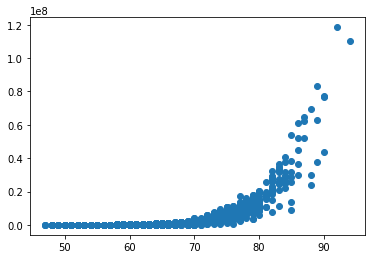

In [47]:
import matplotlib.pyplot as plt
ov_list = df_sample['Overall'].tolist()
val_list = df_sample['Value'].tolist()
plt.scatter(ov_list,val_list)
plt.show()

In [48]:
msk = np.random.rand(len(df)) < 0.95
train = df[msk]
test = df[~msk]

In [49]:
df.shape,train.shape,test.shape,17955*0.95

((17955, 9), (17003, 9), (952, 9), 17057.25)

In [50]:
feat_cols = cols
feat_cols


['Age',
 'Overall',
 'Potential',
 'International_Reputation',
 'Skill_Moves',
 'Position',
 'avg_best']

In [51]:
train['features'] = df.apply(lambda row: [row[col] for col in feat_cols],axis=1)
train.head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,avg_best,features
0,L. Messi,31.0,94.0,94.0,110500000.0,5.0,4.0,5.0,95.8,"[31.0, 94.0, 94.0, 5.0, 4.0, 5.0, 95.8]"
1,Cristiano Ronaldo,33.0,94.0,94.0,77000000.0,5.0,5.0,5.0,95.2,"[33.0, 94.0, 94.0, 5.0, 5.0, 5.0, 95.2]"
2,Neymar Jr,26.0,92.0,93.0,118500000.0,5.0,5.0,4.0,95.0,"[26.0, 92.0, 93.0, 5.0, 5.0, 4.0, 95.0]"
4,K. De Bruyne,27.0,91.0,92.0,102000000.0,4.0,4.0,3.0,92.2,"[27.0, 91.0, 92.0, 4.0, 4.0, 3.0, 92.2]"
5,E. Hazard,27.0,91.0,91.0,93000000.0,4.0,4.0,5.0,94.4,"[27.0, 91.0, 91.0, 4.0, 4.0, 5.0, 94.4]"


In [52]:
test['features'] = df.apply(lambda row: [row[col] for col in feat_cols],axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
test.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,avg_best,features
3,De Gea,27.0,91.0,93.0,72000000.0,4.0,1.0,1.0,89.8,"[27.0, 91.0, 93.0, 4.0, 1.0, 1.0, 89.8]"
19,T. Courtois,26.0,89.0,90.0,53500000.0,4.0,1.0,1.0,86.8,"[26.0, 89.0, 90.0, 4.0, 1.0, 1.0, 86.8]"
28,J. Rodríguez,26.0,88.0,89.0,69500000.0,4.0,4.0,3.0,90.2,"[26.0, 88.0, 89.0, 4.0, 4.0, 3.0, 90.2]"
31,C. Eriksen,26.0,88.0,91.0,73500000.0,3.0,4.0,3.0,90.8,"[26.0, 88.0, 91.0, 3.0, 4.0, 3.0, 90.8]"
54,Piqué,31.0,87.0,87.0,34000000.0,4.0,2.0,2.0,87.0,"[31.0, 87.0, 87.0, 4.0, 2.0, 2.0, 87.0]"


In [54]:
X_train = np.array(train['features'].tolist())
X_test = np.array(test['features'].tolist())
X_train.shape, X_test.shape

((17003, 7), (952, 7))

In [55]:
Y_train = np.array(train['Value'])
Y_test = np.array(test['Value'])
Y_train.shape, Y_test.shape

((17003,), (952,))

In [56]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=30, 
                            n_estimators=40)

In [57]:
regr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
train_pred = regr.predict(X_train)

In [59]:
train['pred']  = train_pred

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
train.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,avg_best,features,pred
0,L. Messi,31.0,94.0,94.0,110500000.0,5.0,4.0,5.0,95.8,"[31.0, 94.0, 94.0, 5.0, 4.0, 5.0, 95.8]",99737500.0
1,Cristiano Ronaldo,33.0,94.0,94.0,77000000.0,5.0,5.0,5.0,95.2,"[33.0, 94.0, 94.0, 5.0, 5.0, 5.0, 95.2]",91750000.0
2,Neymar Jr,26.0,92.0,93.0,118500000.0,5.0,5.0,4.0,95.0,"[26.0, 92.0, 93.0, 5.0, 5.0, 4.0, 95.0]",108787500.0
4,K. De Bruyne,27.0,91.0,92.0,102000000.0,4.0,4.0,3.0,92.2,"[27.0, 91.0, 92.0, 4.0, 4.0, 3.0, 92.2]",91637500.0
5,E. Hazard,27.0,91.0,91.0,93000000.0,4.0,4.0,5.0,94.4,"[27.0, 91.0, 91.0, 4.0, 4.0, 5.0, 94.4]",93512500.0


In [61]:
test_pred = regr.predict(X_test)

In [62]:
test['pred']  = test_pred

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
test.head(5)

,Name,Age,Overall,Potential,Value,International_Reputation,Skill_Moves,Position,avg_best,features,pred
3,De Gea,27.0,91.0,93.0,72000000.0,4.0,1.0,1.0,89.8,"[27.0, 91.0, 93.0, 4.0, 1.0, 1.0, 89.8]",72762500.0
19,T. Courtois,26.0,89.0,90.0,53500000.0,4.0,1.0,1.0,86.8,"[26.0, 89.0, 90.0, 4.0, 1.0, 1.0, 86.8]",49712500.0
28,J. Rodríguez,26.0,88.0,89.0,69500000.0,4.0,4.0,3.0,90.2,"[26.0, 88.0, 89.0, 4.0, 4.0, 3.0, 90.2]",64737500.0
31,C. Eriksen,26.0,88.0,91.0,73500000.0,3.0,4.0,3.0,90.8,"[26.0, 88.0, 91.0, 3.0, 4.0, 3.0, 90.8]",72087500.0
54,Piqué,31.0,87.0,87.0,34000000.0,4.0,2.0,2.0,87.0,"[31.0, 87.0, 87.0, 4.0, 2.0, 2.0, 87.0]",32600000.0


In [64]:
N_train = len(Y_train)
N_test = len(Y_test)
N_train,N_test

(17003, 952)

In [65]:
rmse_train = np.sqrt(np.sum((Y_train-train_pred)**2)/N_train)
rmse_train

284952.72912339924

In [66]:
rmse_test = np.sqrt(np.sum((Y_test-test_pred)**2)/N_test)
rmse_test

597192.671374185

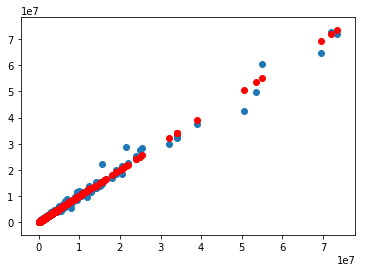

In [67]:
val_list = test['Value'].tolist()
pred_list = test['pred'].tolist()
plt.scatter(val_list,pred_list)
plt.scatter(val_list,val_list,c='red')
plt.show()